In [2]:
import pandas as pd
import numpy as np
np.random.seed(seed=23)

In [13]:
# Create a random variable, that a has probability of being 1 26% of the time. Draw 50 observations from the sample
p_1 = 0.26
a_sample  = np.random.choice((0,1), p= [1-p_1, p_1], size = 500)
print(a_sample)
print( a_sample.mean())

[0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0
 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0
 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0
 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1
 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 1 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0
 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 

In [18]:
# Confirm that when you draw from this sample many times, on average it has mean of 0.26

#Create an empty list
sample_means = []

#Loop through an operation 1000 times
for i in range (1000):
    #draw from distribution
    a_sample  = np.random.choice((0,1), p= [1-p_1, p_1], size = 50)
    #append value to list
    sample_means.append(a_sample.mean())

#Move list to pandas series
sample_means = pd.Series(sample_means)
print(sample_means)

0      0.34
1      0.20
2      0.16
3      0.26
4      0.22
       ... 
995    0.30
996    0.08
997    0.28
998    0.30
999    0.30
Length: 1000, dtype: float64


<AxesSubplot:ylabel='Frequency'>

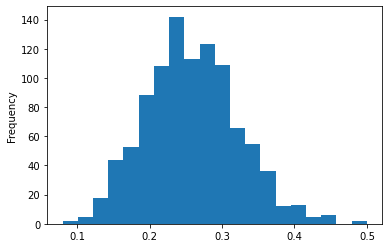

In [24]:
#plot a histogram of your sample means
sample_means.plot.hist(bins=20)

In [27]:
# create a function 
def sum_2_numbers (a, b):
    out = a + b
    return out

sum_2_numbers (5,7)

12

<AxesSubplot:ylabel='Frequency'>

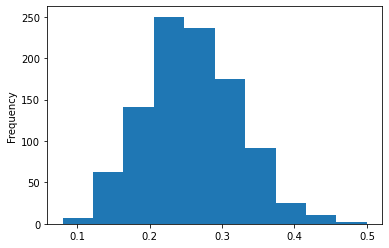

In [30]:
# create with other fucntions in it 
# hint in part 1.c and  3.a, I ask you to move calculations you did elsewhere into a function. 
# Its not the same function as we practice with here, but it should this should be model
def plot_hist( aList, bins):
    aSeries= pd.Series(aList)
    out = aSeries.plot.hist(bins=bins)
    return out

plot_hist(sample_means, bins = 10)

In [44]:
# I ask you to use the proportins z-test function. 
# That is a function that will calculat whether to proportions from two samples 
    #statsmodels.stats.proportion.proportions_ztest    
        #(count, nobs, value=None, alternative='two-sided', prop_var=False)
        # count and nobs are both list (or arrays), that have values for Cell A and Cell B.
        # Count is the number of positives (1) in the cell
        # nobs is the number of users sampled in the cell
    # it returns a z-score, which is the test statistic of this test, and a p-value
# more documentation can be found here L
#https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html

In [55]:
from statsmodels.stats.proportion import proportions_ztest
t_stat, p_val = proportions_ztest( [24, 35], [100,100] )
print (t_stat, p_val)

-1.705580102485929 0.08808628661723292


In [47]:
#Create a varabile that captures if an outcome is statistically significant
if p_val < 0.5:
    stat_sig = 1
else:
    stat_sig =0 
print (stat_sig)

1


In [64]:
t_stat, p_val = proportions_ztest( [.24*500, .35*500], [500,500] )
print (t_stat, p_val)

-3.813793050229595 0.00013685007755335558


In [56]:
# I want to teach you how to calculate power in python. We will keep using statsmodels to do it
# Unfortunately, stat_models does not have a proportion z test power calculator, but it has something pretty close
# We can use the z-test solve power function.
# Remember that a proportion is just the mean is of a [0,1] binary variable
# For this function, you need to put in 3 of the following 4 arguments. It will solve for the fourth. 
    #- an effect size
    # -the number of observations in cell 1
    # - alpha (typically 0.05)
    # - power (typically 0.8)



In [50]:
from statsmodels.stats.power import zt_ind_solve_power


In [57]:


#One thing to note is that the effect size needs to be normalized by the standard devaition.


####WRONG#####
# Why? .35-.24 is *not* scaled by the standard devation

#Calulate Power of design
zt_ind_solve_power (.35-.24, 100, .05)



0.12166654162207038

In [90]:
# to correct this we need to take the 
avg = (.35+.24)/2
st_dev = (avg*(1-avg))**(1/2)

#Calulate Power of design
zt_ind_solve_power (effect_size = ((.35-.24)/st_dev), nobs1= 100, alpha = .05)

0.3997229075216326

In [89]:
#Calculate necessary sample size to achieve power
zt_ind_solve_power (effect_size = ((.35-.24)/st_dev), alpha = .05, power = .8)

269.8126883692603

In [97]:
#or, so you don't screw it up, write a function
def scale_effect (p1, p2):
    avg = p1+ p2
    st_dev = (avg*(1-avg))**(1/2)
    scaled = (p2 -p1)/st_dev
    return scaled

In [104]:
# put some values in a data_frame
aList1 = [1,2,3,4,5]
aList2 = [1,4,9,16,25]
aDict = {"a": aList1, "b": aList2}
df = pd.DataFrame(aDict)
df

,a,b
0,1,1
1,2,4
2,3,9
3,4,16
4,5,25


<AxesSubplot:xlabel='a'>

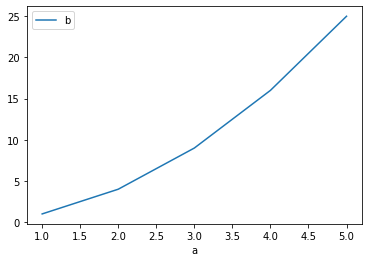

In [105]:
df.plot.line(x='a', y='b')

In [106]:
#find the value of a in the row for which the first value of b >10

In [108]:
df.a

0    1
1    2
2    3
3    4
4    5
Name: a, dtype: int64

In [110]:
df.a[df.b >10]

3    4
4    5
Name: a, dtype: int64

In [111]:
df.a[df.b >10].min()

4

In [114]:
#Loop through values in a list
aList = [1,2,3,4,5]

for i in aList:
    print(i**2)

1
4
9
16
25
